In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.stats.stattools import durbin_watson

In [2]:
import warnings
warnings.filterwarnings("ignore")

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [3]:
df = pd.read_csv("~/GitHubRepos/FinancialEconometrics/DataWork/Data/General_ds_cleaned.csv")
df = df[["date", "beta0", "beta1", "beta2", "tau", "WLbeta0", "WLbeta1", "WLbeta2", "WLtau"]]
# df = df[["date", "0.25", "0.5", "0.75", "1.0", "2.0", "3.0", "5.0", "7.0", "10.0", "15.0", "20.0", "30.0"]]
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", drop=True, inplace=True)

In [18]:
df = df[["beta0", "beta1", "beta2"]]

In [19]:
df.columns = [r"$\beta _0$", r"$\beta _1$", r"$\beta _2$"]

In [21]:
df = df.diff().dropna()

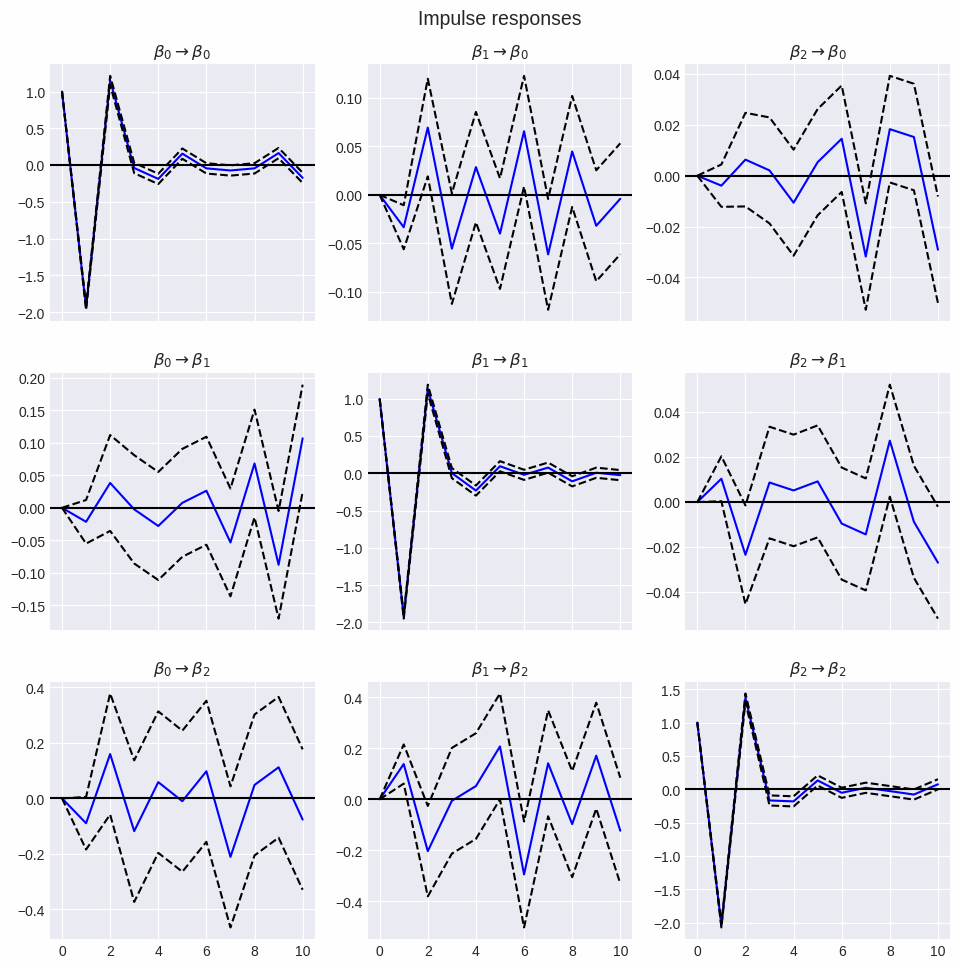

In [23]:
model = VAR(df)
p = 1
model_fitted = model.fit(p)
model_fitted.irf(periods=10, var_decomp=None, var_order=None).plot()
plt.savefig("irfs.pdf")